In [2]:
import pandas as pd
import joblib
df = pd.read_csv("C:/Users/pralo/AI-marketing-optimization/data/cleaned/mmm_model_ready.csv")
df.head()

,display_ads,social_ads,affiliate_ads,GMV,week,display_ads_lag_1,display_ads_lag_2,display_ads_lag_3,display_ads_lag_4,social_ads_lag_1,...,social_ads_lag_3,social_ads_lag_4,affiliate_ads_lag_1,affiliate_ads_lag_2,affiliate_ads_lag_3,affiliate_ads_lag_4,display_ads_4w_avg,social_ads_4w_avg,affiliate_ads_4w_avg,GMV_4w_avg
0,180.8,10.8,58.4,12.9,2022-01-30,151.5,17.2,44.5,230.1,41.3,...,39.3,37.8,58.5,69.3,45.1,69.2,98.500,34.325,57.825,12.775
1,8.7,48.9,75.0,7.2,2022-02-06,180.8,151.5,17.2,44.5,10.8,...,45.9,39.3,58.4,58.5,69.3,45.1,89.550,36.725,65.300,11.975
2,57.5,32.8,23.5,11.8,2022-02-13,8.7,180.8,151.5,17.2,48.9,...,41.3,45.9,75.0,58.4,58.5,69.3,99.625,33.450,53.850,12.600
3,120.2,19.6,11.6,13.2,2022-02-20,57.5,8.7,180.8,151.5,32.8,...,10.8,41.3,23.5,75.0,58.4,58.5,91.800,28.025,42.125,11.275
4,8.6,2.1,1.0,4.8,2022-02-27,120.2,57.5,8.7,180.8,19.6,...,48.9,10.8,11.6,23.5,75.0,58.4,48.750,25.850,27.775,9.250


In [3]:
feature_cols = [c for c in df.columns if c not in ["week", "GMV", "GMV_4w_avg"]]
X = df[feature_cols]
y = df["GMV_4w_avg"]

In [4]:
split_idx = (int)(len(df)*0.8)

x_train = X.iloc[:split_idx]
x_test = X.iloc[split_idx:]

y_train = y.iloc[:split_idx]
y_test = y.iloc[split_idx:]

In [5]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(
    n_estimators = 300,
    max_depth = 6, 
    min_samples_leaf= 5,
    bootstrap= True
)

In [6]:
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

In [7]:
from sklearn.metrics import r2_score, mean_absolute_error

print(f"RF r2_score is: {r2_score(y_test, y_pred)}")
print(f"RF mean abs score is: {mean_absolute_error(y_test, y_pred)}")

RF r2_score is: 0.8087844189489075
RF mean abs score is: 0.8756478055079393


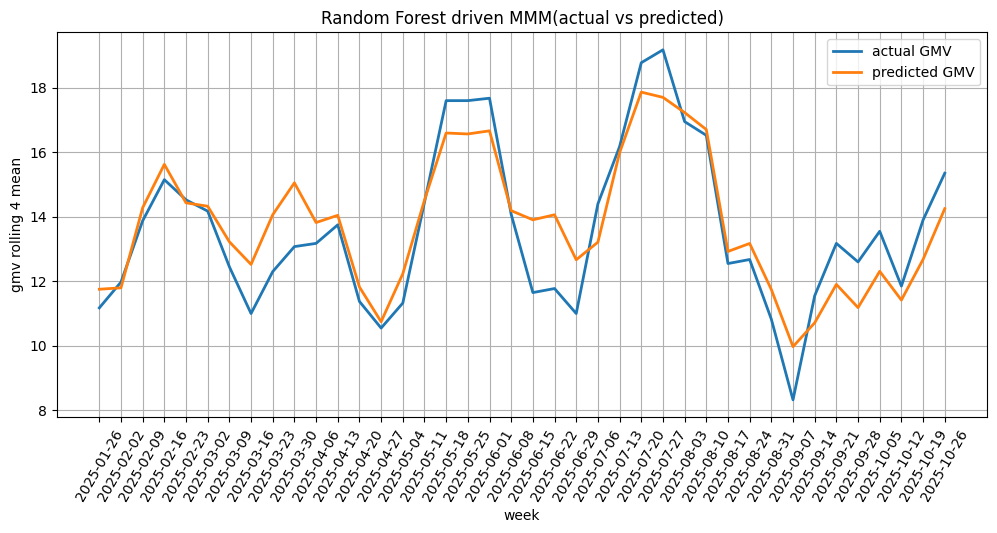

In [8]:
import matplotlib.pyplot as plt

week = df.iloc[len(y_train):]["week"].values

plt.figure(figsize = (12, 5))
plt.plot(week, y_test.values, label = "actual GMV", linewidth = 2)
plt.plot(week, y_pred, label = "predicted GMV", linewidth = 2)
plt.title("Random Forest driven MMM(actual vs predicted)")
plt.xlabel("week")
plt.ylabel("gmv rolling 4 mean")
plt.legend()
plt.xticks(rotation = 60)
plt.grid(True)
plt.show()

In [9]:
importances = pd.DataFrame({
    "feature": feature_cols,
    "importance": rf.feature_importances_
}).sort_values("importance", ascending=False)

importances.head(10)

,feature,importance
15,display_ads_4w_avg,0.687309
16,social_ads_4w_avg,0.240748
5,display_ads_lag_3,0.016037
9,social_ads_lag_3,0.012200
0,display_ads,0.007964
6,display_ads_lag_4,0.004699
1,social_ads,0.003810
8,social_ads_lag_2,0.003662
3,display_ads_lag_1,0.003249
4,display_ads_lag_2,0.003141


In [11]:
joblib.dump(rf, "C:/Users/pralo/AI-marketing-optimization/models/rf_mmm_model.pkl")
joblib.dump(x_test, "C:/Users/pralo/AI-marketing-optimization/models/x_test_mmm_model.pkl")
joblib.dump(x_train.columns.tolist(), "C:/Users/pralo/AI-marketing-optimization/models/feature_names.pkl")

['C:/Users/pralo/AI-marketing-optimization/models/feature_names.pkl']

## Conclusion

A Random Forest model was trained to capture potential non-linear relationships and interactions in the marketing mix. While predictive performance did not surpass the linear and regularized models, the Random Forest provides valuable insights into non-linear effects and feature importance, making it useful for explainability and further SHAP-based analysis.